<a href="https://colab.research.google.com/github/darthfelipe21/tf_practice/blob/main/TF_LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  !tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/bin/bash: line 1: tensorflow_version: command not found
2.19.0


In [2]:
# Load data from sklearn
from sklearn.datasets import load_breast_cancer

In [3]:
# Look at data
data = load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape

(569, 30)

In [6]:
print(data.target_names)

['malignant' 'benign']


In [7]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.3)

In [9]:
N, D = X_train.shape
N,D

(398, 30)

In [10]:
# Estandarizar los datos para que tengan un media de 0 y una desviacion estandar de 1 (distribución normal)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Se usa fit_transform para que calcule la media y la desviación estandar de los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Se usa solo transform porque la datos de media y desviación estandar ya fueron calculados dentro del entrenamiento
X_test = scaler.transform(X_test)

In [11]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Input(shape=(D,)),
     tf.keras.layers.Dense(1, activation='sigmoid')]
)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.3566 - loss: 1.1283 - val_accuracy: 0.4269 - val_loss: 1.0549
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3951 - loss: 1.0029 - val_accuracy: 0.4737 - val_loss: 0.9435
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4508 - loss: 0.9442 - val_accuracy: 0.5263 - val_loss: 0.8415
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5125 - loss: 0.8384 - val_accuracy: 0.5789 - val_loss: 0.7506
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5691 - loss: 0.7420 - val_accuracy: 0.6667 - val_loss: 0.6709
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6547 - loss: 0.6866 - val_accuracy: 0.7135 - val_loss: 0.6020
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7096 - loss: 0.6036 - val_accuracy: 0.7544 - val_loss: 0.5436
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7391 - loss: 0.5673 - val_accuracy: 0.7778 -

In [13]:
print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9807 - loss: 0.0954 
Train Score:  [0.09600242227315903, 0.9824120402336121]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9775 - loss: 0.0962 
Test Score:  [0.105872742831707, 0.9707602262496948]


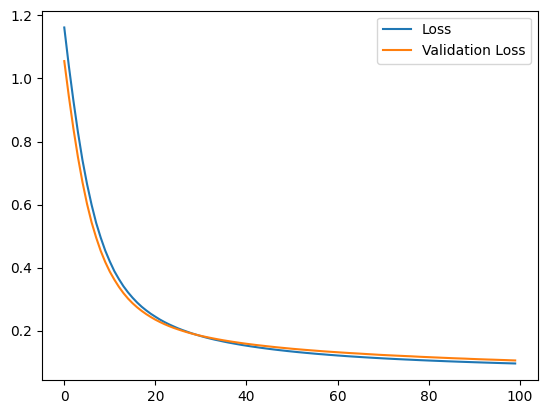

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

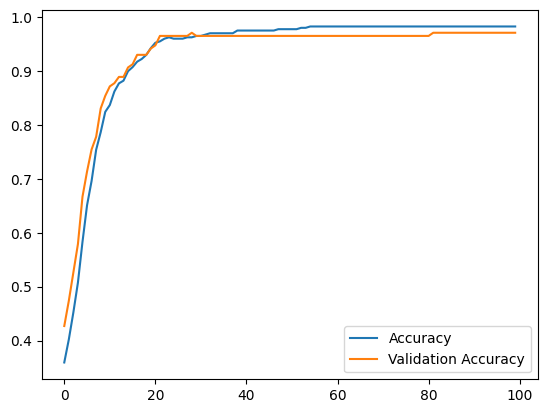

In [15]:
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

## Part 2: Making Predictions

In [16]:
P = model.predict(X_test)
P  # They are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[5.07660792e-04],
       [9.04713333e-01],
       [8.08329787e-03],
       [7.35501051e-02],
       [9.97796357e-01],
       [3.20697218e-01],
       [3.00608844e-01],
       [8.76982172e-04],
       [6.10875571e-03],
       [9.96079803e-01],
       [1.80766005e-02],
       [9.81098950e-01],
       [9.28810060e-01],
       [3.94649012e-03],
       [7.38959134e-01],
       [8.80156338e-01],
       [1.47635649e-06],
       [8.22238803e-01],
       [4.12297919e-02],
       [9.22783315e-01],
       [9.91176963e-01],
       [1.42096728e-01],
       [2.66626826e-04],
       [9.84566510e-01],
       [9.81629848e-01],
       [9.84159946e-01],
       [9.74737525e-01],
       [5.15307188e-01],
       [9.82148588e-01],
       [9.87928927e-01],
       [1.12764596e-04],
       [9.57688987e-01],
       [3.34466636e-01],
       [9.66167271e-01],
       [9.92024362e-01],
       [9.98231173e-01],
       [1.59466325e-03],
       [5.04488617e-06],
       [9.80511367e-01],
       [9.74001467e-01],


In [17]:
# Round to get the actual predictions
# Note: has to be flattered since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
P

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1.], dtype=float32)

In [19]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy: ", np.mean(P == y_test)) # P == y_test genera un array booleano del mismo tamaño, donde cada elemento es True o False
print("Evaluate output: ", model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.9707602339181286
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9775 - loss: 0.0962 
Evaluate output:  [0.105872742831707, 0.9707602262496948]


## Part 3 : Saving and Loading a Model

In [ ]:
# Let's now save our model to a file
model.save('linearClassifier.h5')

In [ ]:
# Check taht the model file exist
!ls -lh

In [ ]:
# Let's load the model and confirm taht it still works
# Note: There is a bug in keras where load/save only works if you DON'T use the input() layer explicity
# So, male sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearClassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)